### Step 1: Importing important libraries. *Numpy:* Linear Algebra and manipulation of data. *Keras:* High-level API built on top of Tensorflow. *SKLearn:* Machine Learning libraries that holds datasets, models and other useful functions.

In [196]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



## *Problem statement: Given the dimensions of petal and sepal, can we predict the species of Iris?*
### Classification Problem: 3 Classes = Setosa, Versicolor and Virginica. Total number of samples: 150 (50 in each class). 

![alt text](https://thegoodpython.com/assets/images/iris-species.png)

### Step 2: Loading and visualizing the data.* Seaborn:* Data Visualization library built on top of Matplotlib
### **Class 0:** Setosa **Class 1:** Versicolor **Class 2:** Virginica

Example of training value = [5.1 3.5 1.4 0.3]
Example of target value = 0


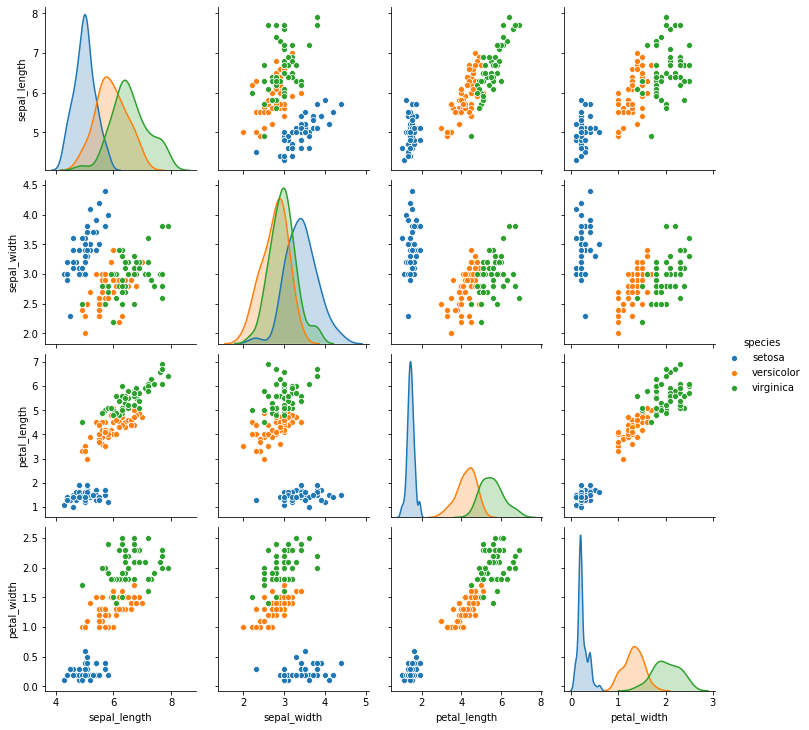

In [197]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
iris = load_iris()
iris_x = iris.data
iris_y = iris.target

iriss = pd.DataFrame(iris_x)
iriss['target']=iris_y

#shuffling the dataset
iris_new = shuffle(iriss)
iris_new.reset_index(drop=True)

X = iris_new.iloc[:, 0:4].values
y=iris_new.iloc[:, -1].values

#(Sepal Length, Sepal Width, Petal Length, Petal Width)in centimeters
print("Example of training value = {}".format(X[0]))
#(Target Class)
print("Example of target value = {}".format(y[0]))

sb.pairplot(sb.load_dataset("iris"),hue='species')

In [198]:
#Converting class vector from row vector to column vector
print(y.shape)
y = y.reshape(-1,1)
print(y.shape)
print(X.shape)

(150,)
(150, 1)
(150, 4)


### Step 3: Building the model

In [199]:
from sklearn.model_selection import KFold

In [200]:
iris_ye = OneHotEncoder(sparse=False).fit_transform(y)
train_x,test_x,train_y,test_y = train_test_split(X,iris_ye,test_size=0.2)
print(train_y.shape)

(120, 3)


In [201]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []
num_folds = 5

# Merge inputs and targets
inputs = np.concatenate((train_x, test_x), axis=0)
targets = np.concatenate((train_y, test_y), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

    iris_m = Sequential()
    iris_m.add(Dense(4,input_shape=(4,),activation='relu',name='Layer',kernel_initializer=keras.initializers.lecun_uniform()))
    
    iris_m.add(Dense(5,activation='relu',name='HiddenLayer'))
    
    iris_m.add(Dense(3,activation='softmax',name='Output'))

    iris_m.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

     # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    history = iris_m.fit(train_x,train_y,verbose=0,batch_size=2,validation_data=(test_x,test_y),epochs=200)
    

    fold_no = fold_no + 1

    




------------------------------------------------------------------------
Training for fold 1 ...
Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 1s 12ms/step - loss: 1.8198 - accuracy: 0.4000 - val_loss: 1.2642 - val_accuracy: 0.7333
Epoch 2/200
120/120 [==============================] - 0s 733us/step - loss: 1.2526 - accuracy: 0.6500 - val_loss: 1.0261 - val_accuracy: 0.7333
Epoch 3/200
120/120 [==============================] - 0s 800us/step - loss: 0.9903 - accuracy: 0.6500 - val_loss: 0.8764 - val_accuracy: 0.7333
Epoch 4/200
120/120 [==============================] - 0s 733us/step - loss: 0.8360 - accuracy: 0.6917 - val_loss: 0.8240 - val_accuracy: 0.6000
Epoch 5/200
120/120 [==============================] - 0s 710us/step - loss: 0.7699 - accuracy: 0.7083 - val_loss: 0.7940 - val_accuracy: 0.6000
Epoch 6/200
120/120 [==============================] - 0s 777us/step - loss: 0.7291 - accuracy: 0.7000 - val_loss: 0.7483 - val_accura

Epoch 56/200
120/120 [==============================] - 0s 733us/step - loss: 0.0940 - accuracy: 0.9833 - val_loss: 0.0875 - val_accuracy: 0.9667
Epoch 57/200
120/120 [==============================] - 0s 667us/step - loss: 0.0921 - accuracy: 0.9833 - val_loss: 0.0864 - val_accuracy: 1.0000
Epoch 58/200
120/120 [==============================] - 0s 676us/step - loss: 0.0919 - accuracy: 0.9833 - val_loss: 0.0836 - val_accuracy: 0.9667
Epoch 59/200
120/120 [==============================] - 0s 733us/step - loss: 0.0999 - accuracy: 0.9750 - val_loss: 0.0870 - val_accuracy: 0.9667
Epoch 60/200
120/120 [==============================] - 0s 667us/step - loss: 0.0915 - accuracy: 0.9750 - val_loss: 0.0868 - val_accuracy: 0.9667
Epoch 61/200
120/120 [==============================] - 0s 733us/step - loss: 0.0842 - accuracy: 0.9833 - val_loss: 0.0857 - val_accuracy: 1.0000
Epoch 62/200
120/120 [==============================] - 0s 667us/step - loss: 0.0925 - accuracy: 0.9667 - val_loss: 0.0778 -

120/120 [==============================] - 0s 733us/step - loss: 0.0752 - accuracy: 0.9667 - val_loss: 0.0594 - val_accuracy: 0.9667
Epoch 113/200
120/120 [==============================] - 0s 640us/step - loss: 0.0685 - accuracy: 0.9833 - val_loss: 0.0591 - val_accuracy: 1.0000
Epoch 114/200
120/120 [==============================] - 0s 645us/step - loss: 0.0702 - accuracy: 0.9833 - val_loss: 0.0608 - val_accuracy: 0.9667
Epoch 115/200
120/120 [==============================] - 0s 667us/step - loss: 0.0671 - accuracy: 0.9917 - val_loss: 0.0617 - val_accuracy: 0.9667
Epoch 116/200
120/120 [==============================] - 0s 667us/step - loss: 0.0681 - accuracy: 0.9833 - val_loss: 0.0571 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 733us/step - loss: 0.0720 - accuracy: 0.9750 - val_loss: 0.0591 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 667us/step - loss: 0.0683 - accuracy: 0.9750 - val_loss: 0.0640 - val_ac

120/120 [==============================] - 0s 667us/step - loss: 0.0659 - accuracy: 0.9833 - val_loss: 0.0546 - val_accuracy: 0.9667
Epoch 168/200
120/120 [==============================] - 0s 636us/step - loss: 0.0618 - accuracy: 0.9833 - val_loss: 0.0518 - val_accuracy: 0.9667
Epoch 169/200
120/120 [==============================] - 0s 674us/step - loss: 0.0594 - accuracy: 0.9833 - val_loss: 0.0591 - val_accuracy: 0.9667
Epoch 170/200
120/120 [==============================] - 0s 762us/step - loss: 0.0625 - accuracy: 0.9833 - val_loss: 0.0541 - val_accuracy: 0.9667
Epoch 171/200
120/120 [==============================] - 0s 767us/step - loss: 0.0603 - accuracy: 0.9833 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 172/200
120/120 [==============================] - ETA: 0s - loss: 0.0653 - accuracy: 0.9674   - 0s 742us/step - loss: 0.0611 - accuracy: 0.9750 - val_loss: 0.0621 - val_accuracy: 0.9667
Epoch 173/200
120/120 [==============================] - 0s 733us/step - loss: 0.0625 

Epoch 22/200
120/120 [==============================] - 0s 800us/step - loss: 0.2830 - accuracy: 0.9333 - val_loss: 0.3178 - val_accuracy: 0.8667
Epoch 23/200
120/120 [==============================] - 0s 800us/step - loss: 0.2795 - accuracy: 0.9000 - val_loss: 0.3097 - val_accuracy: 0.9000
Epoch 24/200
120/120 [==============================] - 0s 867us/step - loss: 0.2668 - accuracy: 0.9250 - val_loss: 0.2965 - val_accuracy: 0.9333
Epoch 25/200
120/120 [==============================] - 0s 809us/step - loss: 0.2670 - accuracy: 0.9333 - val_loss: 0.3072 - val_accuracy: 0.9000
Epoch 26/200
120/120 [==============================] - 0s 733us/step - loss: 0.2548 - accuracy: 0.9167 - val_loss: 0.2885 - val_accuracy: 0.9000
Epoch 27/200
120/120 [==============================] - 0s 800us/step - loss: 0.2505 - accuracy: 0.9333 - val_loss: 0.2783 - val_accuracy: 0.9333
Epoch 28/200
120/120 [==============================] - 0s 800us/step - loss: 0.2400 - accuracy: 0.9333 - val_loss: 0.2762 -

120/120 [==============================] - 0s 867us/step - loss: 0.1146 - accuracy: 0.9500 - val_loss: 0.1436 - val_accuracy: 0.9667
Epoch 79/200
120/120 [==============================] - 0s 933us/step - loss: 0.1119 - accuracy: 0.9583 - val_loss: 0.1432 - val_accuracy: 0.9667
Epoch 80/200
120/120 [==============================] - 0s 867us/step - loss: 0.1079 - accuracy: 0.9583 - val_loss: 0.1441 - val_accuracy: 0.9667
Epoch 81/200
120/120 [==============================] - 0s 835us/step - loss: 0.1084 - accuracy: 0.9583 - val_loss: 0.1396 - val_accuracy: 0.9667
Epoch 82/200
120/120 [==============================] - 0s 867us/step - loss: 0.1066 - accuracy: 0.9500 - val_loss: 0.1391 - val_accuracy: 0.9667
Epoch 83/200
120/120 [==============================] - 0s 733us/step - loss: 0.1057 - accuracy: 0.9583 - val_loss: 0.1532 - val_accuracy: 0.9667
Epoch 84/200
120/120 [==============================] - 0s 800us/step - loss: 0.1105 - accuracy: 0.9667 - val_loss: 0.1364 - val_accuracy

Epoch 134/200
120/120 [==============================] - 0s 699us/step - loss: 0.0719 - accuracy: 0.9667 - val_loss: 0.0949 - val_accuracy: 0.9667
Epoch 135/200
120/120 [==============================] - 0s 636us/step - loss: 0.0774 - accuracy: 0.9750 - val_loss: 0.0979 - val_accuracy: 0.9667
Epoch 136/200
120/120 [==============================] - 0s 680us/step - loss: 0.0794 - accuracy: 0.9667 - val_loss: 0.1012 - val_accuracy: 0.9667
Epoch 137/200
120/120 [==============================] - 0s 694us/step - loss: 0.0781 - accuracy: 0.9583 - val_loss: 0.0947 - val_accuracy: 0.9667
Epoch 138/200
120/120 [==============================] - 0s 667us/step - loss: 0.0743 - accuracy: 0.9667 - val_loss: 0.0927 - val_accuracy: 0.9667
Epoch 139/200
120/120 [==============================] - 0s 667us/step - loss: 0.0849 - accuracy: 0.9750 - val_loss: 0.0929 - val_accuracy: 0.9667
Epoch 140/200
120/120 [==============================] - 0s 667us/step - loss: 0.0739 - accuracy: 0.9667 - val_loss: 0

Epoch 190/200
120/120 [==============================] - 0s 733us/step - loss: 0.0615 - accuracy: 0.9750 - val_loss: 0.0839 - val_accuracy: 0.9667
Epoch 191/200
120/120 [==============================] - 0s 733us/step - loss: 0.0621 - accuracy: 0.9750 - val_loss: 0.0850 - val_accuracy: 0.9667
Epoch 192/200
120/120 [==============================] - 0s 667us/step - loss: 0.0651 - accuracy: 0.9833 - val_loss: 0.0737 - val_accuracy: 0.9667
Epoch 193/200
120/120 [==============================] - 0s 733us/step - loss: 0.0672 - accuracy: 0.9750 - val_loss: 0.0755 - val_accuracy: 0.9667
Epoch 194/200
120/120 [==============================] - 0s 733us/step - loss: 0.0668 - accuracy: 0.9750 - val_loss: 0.0732 - val_accuracy: 0.9667
Epoch 195/200
120/120 [==============================] - 0s 733us/step - loss: 0.0596 - accuracy: 0.9750 - val_loss: 0.0831 - val_accuracy: 0.9667
Epoch 196/200
120/120 [==============================] - 0s 667us/step - loss: 0.0688 - accuracy: 0.9750 - val_loss: 0

120/120 [==============================] - 0s 762us/step - loss: 0.1475 - accuracy: 0.9583 - val_loss: 0.1543 - val_accuracy: 0.9667
Epoch 46/200
120/120 [==============================] - 0s 648us/step - loss: 0.1358 - accuracy: 0.9667 - val_loss: 0.1540 - val_accuracy: 0.9667
Epoch 47/200
120/120 [==============================] - 0s 623us/step - loss: 0.1425 - accuracy: 0.9667 - val_loss: 0.1550 - val_accuracy: 0.9667
Epoch 48/200
120/120 [==============================] - 0s 734us/step - loss: 0.1375 - accuracy: 0.9667 - val_loss: 0.1439 - val_accuracy: 0.9667
Epoch 49/200
120/120 [==============================] - 0s 667us/step - loss: 0.1343 - accuracy: 0.9667 - val_loss: 0.1490 - val_accuracy: 0.9667
Epoch 50/200
120/120 [==============================] - 0s 667us/step - loss: 0.1289 - accuracy: 0.9583 - val_loss: 0.1394 - val_accuracy: 0.9667
Epoch 51/200
120/120 [==============================] - 0s 679us/step - loss: 0.1263 - accuracy: 0.9583 - val_loss: 0.1373 - val_accuracy

120/120 [==============================] - 0s 661us/step - loss: 0.0902 - accuracy: 0.9667 - val_loss: 0.1023 - val_accuracy: 0.9667
Epoch 102/200
120/120 [==============================] - 0s 694us/step - loss: 0.0938 - accuracy: 0.9583 - val_loss: 0.1184 - val_accuracy: 0.9667
Epoch 103/200
120/120 [==============================] - 0s 694us/step - loss: 0.0906 - accuracy: 0.9583 - val_loss: 0.0915 - val_accuracy: 0.9667
Epoch 104/200
120/120 [==============================] - 0s 695us/step - loss: 0.0857 - accuracy: 0.9667 - val_loss: 0.1001 - val_accuracy: 0.9667
Epoch 105/200
120/120 [==============================] - 0s 667us/step - loss: 0.0891 - accuracy: 0.9667 - val_loss: 0.0947 - val_accuracy: 0.9667
Epoch 106/200
120/120 [==============================] - 0s 667us/step - loss: 0.0838 - accuracy: 0.9750 - val_loss: 0.0961 - val_accuracy: 0.9667
Epoch 107/200
120/120 [==============================] - 0s 638us/step - loss: 0.0899 - accuracy: 0.9667 - val_loss: 0.1139 - val_ac

Epoch 157/200
120/120 [==============================] - 0s 800us/step - loss: 0.0790 - accuracy: 0.9667 - val_loss: 0.0765 - val_accuracy: 0.9667
Epoch 158/200
120/120 [==============================] - 0s 667us/step - loss: 0.0804 - accuracy: 0.9667 - val_loss: 0.0913 - val_accuracy: 0.9667
Epoch 159/200
120/120 [==============================] - 0s 644us/step - loss: 0.0748 - accuracy: 0.9667 - val_loss: 0.0837 - val_accuracy: 0.9667
Epoch 160/200
120/120 [==============================] - 0s 756us/step - loss: 0.0709 - accuracy: 0.9667 - val_loss: 0.0822 - val_accuracy: 0.9667
Epoch 161/200
120/120 [==============================] - 0s 654us/step - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.0777 - val_accuracy: 0.9667
Epoch 162/200
120/120 [==============================] - 0s 733us/step - loss: 0.0724 - accuracy: 0.9667 - val_loss: 0.0862 - val_accuracy: 0.9667
Epoch 163/200
120/120 [==============================] - 0s 733us/step - loss: 0.0710 - accuracy: 0.9667 - val_loss: 0

Epoch 12/200
120/120 [==============================] - 0s 800us/step - loss: 1.1206 - accuracy: 0.2083 - val_loss: 1.1088 - val_accuracy: 0.4000
Epoch 13/200
120/120 [==============================] - 0s 733us/step - loss: 1.1182 - accuracy: 0.3167 - val_loss: 1.1155 - val_accuracy: 0.2667
Epoch 14/200
120/120 [==============================] - 0s 733us/step - loss: 1.1181 - accuracy: 0.2250 - val_loss: 1.1091 - val_accuracy: 0.2333
Epoch 15/200
120/120 [==============================] - 0s 733us/step - loss: 1.1164 - accuracy: 0.2417 - val_loss: 1.1109 - val_accuracy: 0.2667
Epoch 16/200
120/120 [==============================] - 0s 733us/step - loss: 1.1173 - accuracy: 0.2833 - val_loss: 1.1113 - val_accuracy: 0.2333
Epoch 17/200
120/120 [==============================] - 0s 733us/step - loss: 1.1153 - accuracy: 0.3250 - val_loss: 1.1154 - val_accuracy: 0.2667
Epoch 18/200
120/120 [==============================] - 0s 733us/step - loss: 1.1120 - accuracy: 0.3250 - val_loss: 1.1152 -

120/120 [==============================] - 0s 800us/step - loss: 0.5978 - accuracy: 0.6917 - val_loss: 0.6207 - val_accuracy: 0.5667
Epoch 69/200
120/120 [==============================] - 0s 682us/step - loss: 0.5892 - accuracy: 0.6917 - val_loss: 0.6130 - val_accuracy: 0.5667
Epoch 70/200
120/120 [==============================] - 0s 800us/step - loss: 0.5814 - accuracy: 0.6917 - val_loss: 0.6054 - val_accuracy: 0.5667
Epoch 71/200
120/120 [==============================] - 0s 733us/step - loss: 0.5746 - accuracy: 0.6917 - val_loss: 0.5995 - val_accuracy: 0.5667
Epoch 72/200
120/120 [==============================] - 0s 800us/step - loss: 0.5675 - accuracy: 0.6917 - val_loss: 0.5936 - val_accuracy: 0.5667
Epoch 73/200
120/120 [==============================] - 0s 667us/step - loss: 0.5612 - accuracy: 0.6917 - val_loss: 0.5867 - val_accuracy: 0.5667
Epoch 74/200
120/120 [==============================] - 0s 637us/step - loss: 0.5551 - accuracy: 0.6917 - val_loss: 0.5812 - val_accuracy

120/120 [==============================] - 0s 700us/step - loss: 0.1788 - accuracy: 0.9500 - val_loss: 0.1588 - val_accuracy: 0.9667
Epoch 125/200
120/120 [==============================] - ETA: 0s - loss: 0.1853 - accuracy: 0.93 - 0s 667us/step - loss: 0.1773 - accuracy: 0.9417 - val_loss: 0.1532 - val_accuracy: 0.9667
Epoch 126/200
120/120 [==============================] - 0s 667us/step - loss: 0.1714 - accuracy: 0.9500 - val_loss: 0.1519 - val_accuracy: 0.9667
Epoch 127/200
120/120 [==============================] - 0s 733us/step - loss: 0.1664 - accuracy: 0.9500 - val_loss: 0.1452 - val_accuracy: 0.9667
Epoch 128/200
120/120 [==============================] - 0s 733us/step - loss: 0.1605 - accuracy: 0.9500 - val_loss: 0.1429 - val_accuracy: 0.9667
Epoch 129/200
120/120 [==============================] - 0s 667us/step - loss: 0.1593 - accuracy: 0.9500 - val_loss: 0.1382 - val_accuracy: 0.9667
Epoch 130/200
120/120 [==============================] - 0s 733us/step - loss: 0.1591 - ac

120/120 [==============================] - 0s 800us/step - loss: 0.1084 - accuracy: 0.9500 - val_loss: 0.0791 - val_accuracy: 0.9667
Epoch 180/200
120/120 [==============================] - 0s 679us/step - loss: 0.1072 - accuracy: 0.9500 - val_loss: 0.0765 - val_accuracy: 0.9667
Epoch 181/200
120/120 [==============================] - 0s 695us/step - loss: 0.1089 - accuracy: 0.9500 - val_loss: 0.0801 - val_accuracy: 0.9667
Epoch 182/200
120/120 [==============================] - 0s 800us/step - loss: 0.1096 - accuracy: 0.9583 - val_loss: 0.0764 - val_accuracy: 0.9667
Epoch 183/200
120/120 [==============================] - 0s 733us/step - loss: 0.1092 - accuracy: 0.9500 - val_loss: 0.0798 - val_accuracy: 0.9667
Epoch 184/200
120/120 [==============================] - 0s 667us/step - loss: 0.1089 - accuracy: 0.9500 - val_loss: 0.0772 - val_accuracy: 0.9667
Epoch 185/200
120/120 [==============================] - 0s 800us/step - loss: 0.1072 - accuracy: 0.9500 - val_loss: 0.0750 - val_ac

120/120 [==============================] - 0s 847us/step - loss: 0.1649 - accuracy: 0.9750 - val_loss: 0.1859 - val_accuracy: 1.0000
Epoch 35/200
120/120 [==============================] - 0s 800us/step - loss: 0.1646 - accuracy: 0.9667 - val_loss: 0.1654 - val_accuracy: 0.9667
Epoch 36/200
120/120 [==============================] - 0s 733us/step - loss: 0.1519 - accuracy: 0.9667 - val_loss: 0.1642 - val_accuracy: 0.9667
Epoch 37/200
120/120 [==============================] - 0s 746us/step - loss: 0.1535 - accuracy: 0.9583 - val_loss: 0.1474 - val_accuracy: 0.9667
Epoch 38/200
120/120 [==============================] - 0s 733us/step - loss: 0.1440 - accuracy: 0.9667 - val_loss: 0.1401 - val_accuracy: 0.9667
Epoch 39/200
120/120 [==============================] - 0s 733us/step - loss: 0.1406 - accuracy: 0.9667 - val_loss: 0.1423 - val_accuracy: 0.9667
Epoch 40/200
120/120 [==============================] - 0s 733us/step - loss: 0.1328 - accuracy: 0.9583 - val_loss: 0.1309 - val_accuracy

120/120 [==============================] - 0s 727us/step - loss: 0.0844 - accuracy: 0.9583 - val_loss: 0.0661 - val_accuracy: 0.9667
Epoch 91/200
120/120 [==============================] - 0s 733us/step - loss: 0.0749 - accuracy: 0.9667 - val_loss: 0.0691 - val_accuracy: 0.9667
Epoch 92/200
120/120 [==============================] - 0s 742us/step - loss: 0.0807 - accuracy: 0.9583 - val_loss: 0.0744 - val_accuracy: 0.9667
Epoch 93/200
120/120 [==============================] - 0s 880us/step - loss: 0.0767 - accuracy: 0.9583 - val_loss: 0.0734 - val_accuracy: 0.9667
Epoch 94/200
120/120 [==============================] - 0s 638us/step - loss: 0.0775 - accuracy: 0.9667 - val_loss: 0.0609 - val_accuracy: 0.9667
Epoch 95/200
120/120 [==============================] - 0s 694us/step - loss: 0.0819 - accuracy: 0.9667 - val_loss: 0.0740 - val_accuracy: 0.9667
Epoch 96/200
120/120 [==============================] - 0s 800us/step - loss: 0.0732 - accuracy: 0.9833 - val_loss: 0.0710 - val_accuracy

120/120 [==============================] - 0s 810us/step - loss: 0.0659 - accuracy: 0.9750 - val_loss: 0.0518 - val_accuracy: 0.9667
Epoch 146/200
120/120 [==============================] - 0s 733us/step - loss: 0.0714 - accuracy: 0.9750 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 147/200
120/120 [==============================] - 0s 678us/step - loss: 0.0777 - accuracy: 0.9667 - val_loss: 0.0613 - val_accuracy: 0.9667
Epoch 148/200
120/120 [==============================] - 0s 733us/step - loss: 0.0678 - accuracy: 0.9833 - val_loss: 0.0543 - val_accuracy: 0.9667
Epoch 149/200
120/120 [==============================] - 0s 733us/step - loss: 0.0668 - accuracy: 0.9750 - val_loss: 0.0592 - val_accuracy: 0.9667
Epoch 150/200
120/120 [==============================] - 0s 800us/step - loss: 0.0708 - accuracy: 0.9750 - val_loss: 0.0686 - val_accuracy: 0.9667
Epoch 151/200
120/120 [==============================] - 0s 754us/step - loss: 0.0755 - accuracy: 0.9667 - val_loss: 0.0544 - val_ac

### Step 4: Training the model

In [202]:
fold_no=1
for train, test in kfold.split(inputs, targets):
    scores = iris_m.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {iris_m.metrics_names[0]} of {scores[0]}; {iris_m.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    fold_no = fold_no + 1

Score for fold 1: loss of 0.053203485906124115; accuracy of 96.66666388511658%
Score for fold 2: loss of 0.0465572327375412; accuracy of 96.66666388511658%
Score for fold 3: loss of 0.11109321564435959; accuracy of 96.66666388511658%
Score for fold 4: loss of 0.057342663407325745; accuracy of 96.66666388511658%
Score for fold 5: loss of 0.014148497954010963; accuracy of 100.0%


In [203]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.053203485906124115 - Accuracy: 96.66666388511658%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.0465572327375412 - Accuracy: 96.66666388511658%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.11109321564435959 - Accuracy: 96.66666388511658%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.057342663407325745 - Accuracy: 96.66666388511658%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.014148497954010963 - Accuracy: 100.0%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 97.33333110809326 (+- 1.3333344459533691)
> Loss: 0.056469019129872323
-------------------------------

In [204]:
from sklearn.metrics import classification_report,confusion_matrix
pred_y = iris_m.predict(test_x)
pred_yl = np.argmax(pred_y,axis=1)
test_yl = np.argmax(test_y,axis=1)
print(classification_report(test_yl,pred_yl))
print(confusion_matrix(test_yl,pred_yl))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.88      0.93         8
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[ 9  0  0]
 [ 0  7  1]
 [ 0  0 13]]


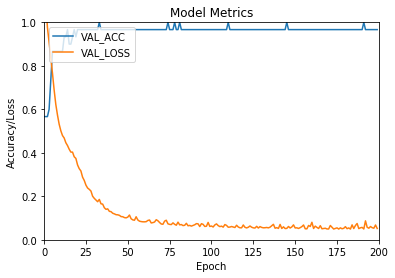

In [205]:
plt.xlim(0,200)
plt.ylim(0.0,1.0)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.title('Model Metrics')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epoch')
plt.legend(['VAL_ACC', 'VAL_LOSS'], loc='upper left')
plt.show()
